In [1]:
import os

def move_to_parent_dir():
    current_directory = os.getcwd()
    parent_directory = os.path.dirname(current_directory)
    os.chdir(parent_directory)
    print("Working directory:", os.getcwd())

move_to_parent_dir() 

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [3]:
# get test data
import matplotlib.pyplot as plt
import numpy as np
from tools import get_Tapes
raw_tapes = get_Tapes(125,0)
tapes_data = [t["Price"].resample("1s").last().ffill().to_numpy() for t in raw_tapes] # resample down to 1 min

# define broker
def broker(actor, price_data: np.array, starting_cash: int):
    time_index = 0
    final_time_index = price_data.shape[0]
    num_stocks = np.zeros_like(price_data)
    cash_value = np.zeros_like(price_data)
    cash_value[0] = starting_cash

    while True:
        action = actor(price_data[:time_index], cash_value[time_index], num_stocks[time_index])

        if action == 1: # buy one stock
            if cash_value[time_index] >= price_data[time_index]:
                cash_value[time_index] = cash_value[time_index] - price_data[time_index]
                num_stocks[time_index] = num_stocks[time_index] + 1

        elif action == 2: # sell one stock
            if num_stocks[time_index] > 0:
                num_stocks[time_index] = num_stocks[time_index] - 1
                cash_value[time_index] = cash_value[time_index] + price_data[time_index]
        else: # do nothing
            pass


        time_index += 1
        if time_index >= final_time_index:
            break

        num_stocks[time_index] = num_stocks[time_index - 1]
        cash_value[time_index] = cash_value[time_index - 1]

    total_value = num_stocks * price_data + cash_value
    profit = (total_value[-1] / starting_cash) - 1
    

    return num_stocks, cash_value, total_value, profit

# generate folds
def generate_folds(tapes_data, n_folds=5):
    tapes_data = np.array(tapes_data)
    fold_size = len(tapes_data) // n_folds
    
    for i in range(n_folds):
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i < n_folds - 1 else len(tapes_data)
        
        test_indices = np.arange(start_index,end_index,1, dtype=int)
        # Test split
        test_data = tapes_data[test_indices]
        
        # Training split
        train_data = np.delete(tapes_data, test_indices, axis=0)
        
        yield train_data, test_data

def display_results(results, data):
    plt.figure(figsize=(20,5))
    plt.plot(results[2], 'r', label = "actor")
    plt.twinx()
    plt.plot(data, 'b', label = "data")
    plt.legend()
    plt.show()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

# Example

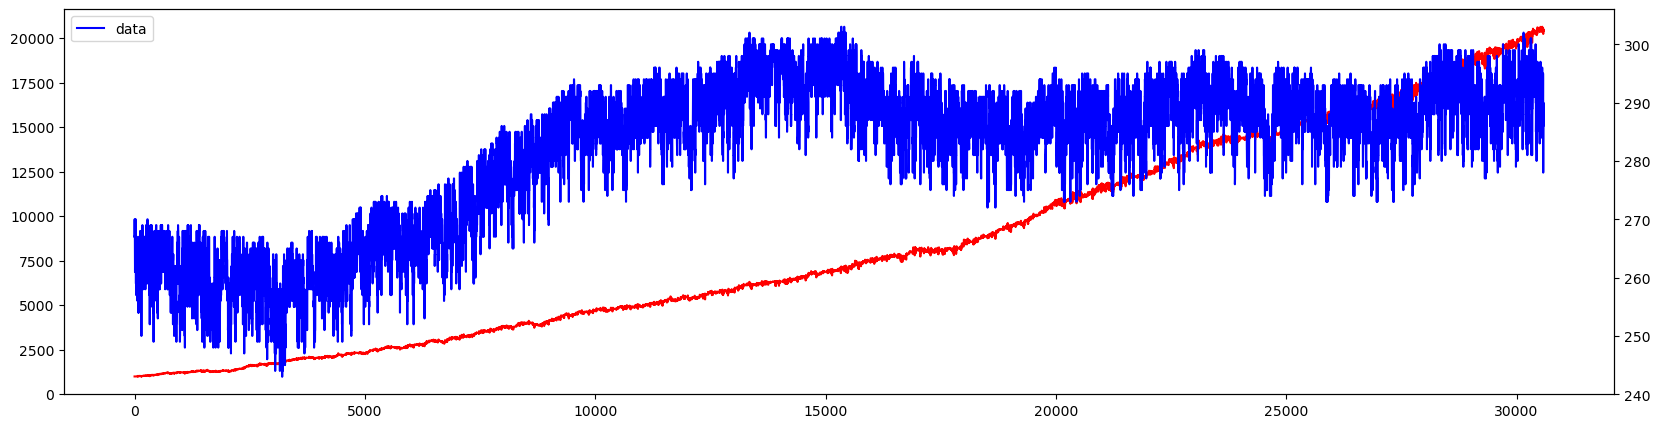

In [6]:
def ANTI_CMA_actor(current_data, current_cash, current_stocks):
    long, short = 30,15
    
    if len(current_data) < 60:
        return 0
    
    ma_s = np.mean(current_data[-short:])
    ma_l = np.mean(current_data[-long:])

    eps = 0
    if ma_s < ma_l + eps:
        return 1
    elif ma_s > ma_l:
        return 2
    else:
        return 0
tapes_day_index = 0
results = broker(ANTI_CMA_actor, tapes_data[tapes_day_index], 1_000)
display_results(results, tapes_data[tapes_day_index])

In [8]:
cv_scores = []
for train_data, test_data in generate_folds(tapes_data):
    # train model
    
    for data in test_data:
        results = broker(ANTI_CMA_actor, data, 1_000)
        cv_scores.append(results[-1])

print(cv_scores)
print(np.mean(cv_scores))
    

C:\Users\benjo\AppData\Local\Temp\ipykernel_6776\290819554.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tapes_data = np.array(tapes_data)


[19.444, 21.212, 21.162, 19.558, 14.144, 22.767, 12.73, 22.932, 26.373, 20.576, 18.094, 27.556, 18.142, 18.983, 22.073, 22.892, 23.273, 25.763, 12.756, 15.170000000000002, 20.862, 24.848, 21.056, 13.275, 18.266, 25.482, 17.281, 19.193, 23.18, 13.244, 22.285, 23.514, 22.318, 22.204, 18.882, 20.661, 20.324, 25.399, 18.231, 20.13, 18.976, 28.357, 18.798, 16.66, 24.157, 22.049, 25.035, 24.987, 23.593, 21.675, 20.308, 20.103, 20.842, 24.094, 19.265, 19.957, 27.06, 20.894, 26.37, 19.178, 21.81, 25.938, 23.462, 20.822, 21.513, 22.57, 23.623, 29.964, 25.623, 20.893, 22.46, 28.22, 22.119, 13.505, 23.976, 25.512, 23.997, 29.716, 19.8, 16.535, 23.249, 27.011, 22.468, 25.267, 23.965, 24.394, 17.996, 23.684, 25.316, 19.253, 21.522, 24.75, 20.595, 22.167, 22.572, 25.131, 22.191, 22.238, 21.853, 24.907, 23.5, 21.568, 21.975, 22.001, 22.354, 23.144, 24.918, 23.906, 21.568, 20.111, 18.088, 24.228, 19.529, 21.111, 22.559, 17.209, 17.851, 21.692, 18.567, 25.007, 21.482, 26.32, 22.471, 24.745, 19.205]
21.